# Test Known Case

In [47]:
using PGFPlots

function _integrate_simpsons(f::Function, a::Real, b::Real, n::Int)
    # integrate using Composite Simpson's rule
    # reference: https://en.wikipedia.org/wiki/Simpson%27s_rule

    @assert(n > 0) # number of intervals
    @assert(mod(n,2) == 0) # n must be even

    h = (b-a)/n
    retval = f(a) + f(b)
    flip = true
    for i = 1 : n-1
        retval += f(a+i*h) * (flip ? 4 : 2)
        flip = !flip
    end
    return h/3*retval
end

_integrate_simpsons (generic function with 1 method)

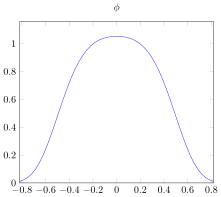

In [27]:
function Ptilde(ϕ::Float64)
    f = [ϕ^2, ϕ^4]
    θ = [-1.0, -8.6]
    exp(dot(θ, f))
end

domain = (-0.82, 0.82)
Z = _integrate_simpsons(Ptilde, domain..., 100)
Axis(PGFPlots.Plots.Linear(x->Ptilde(x)/Z, domain, style="mark=none"), xmin=domain[1], xmax=domain[2], ymin=0.0, title=L"\phi")

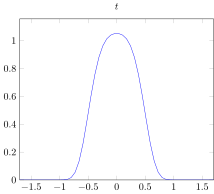

In [25]:
function Ptilde_t(t::Float64)
    f = [t^2, t^4]
    θ = [-1.0, -8.6]
    exp(dot(θ, f))
end

domain = (-1.7, 1.7)

Z = _integrate_simpsons(Ptilde_t, domain..., 100)
Axis(PGFPlots.Plots.Linear(x->Ptilde_t(x)/Z, domain, style="mark=none"), xmin=domain[1], xmax=domain[2], ymin=0.0, title=L"t")

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"w1",0.0,linspace(-10.0,10.0,41),".3f",true)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"w2",0.0,linspace(-10.0,10.0,41),".3f",true)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"w3",0.0,linspace(-10.0,10.0,41),".3f",true)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"w4",0.0,linspace(-10.0,10.0,41),".3f",true)

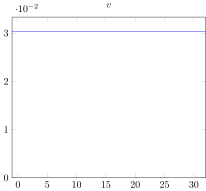

In [46]:
using Interact

@manipulate for w1 in linspace(-10.0,10.0,41),
                w2 in linspace(-10.0,10.0,41),
                w3 in linspace(-10.0,10.0,41),
                w4 in linspace(-10.0,10.0,41)
    
function Ptilde_v(v::Float64)
    μ, σ = 13.0, 32.0-13.0
    v = (v - μ)/σ
    v = clamp(v, -1.0, 1.0)
    
    f = [v, v^2, v^3, v^4]
    θ = [w1, w2, w3, w4]
    exp(dot(θ, f))
end

domain = (-1.0, 32.0)

Z = _integrate_simpsons(Ptilde_v, domain..., 100)
Axis(PGFPlots.Plots.Linear(x->Ptilde_v(x)/Z, domain, style="mark=none"), xmin=domain[1], xmax=domain[2], ymin=0.0, title=L"v")
end

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"w1",0.0,linspace(-20.0,20.0,41),".3f",true)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"w2",0.0,linspace(-10.0,10.0,41),".3f",true)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"w3",0.0,linspace(-10.0,10.0,41),".3f",true)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"w4",0.0,linspace(-10.0,10.0,41),".3f",true)

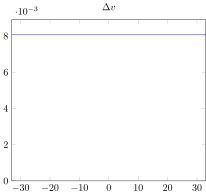

In [45]:
using Interact

@manipulate for w1 in linspace(-20.0,20.0,41),
                w2 in linspace(-10.0,10.0,41),
                w3 in linspace(-10.0,10.0,41),
                w4 in linspace(-10.0,10.0,41)
    
    function Ptilde_dv(dv::Float64)
        μ, σ = 0.0, 15.0
        dv = (dv - μ)/σ
        dv = clamp(dv, -1.0, 1.0)

        f = [dv^2, dv^4]
        θ = [w1, w2]
        exp(dot(θ, f))
    end

    domain = (-33.0, 33.0)

    Z = _integrate_simpsons(Ptilde_v, domain..., 100)
    Axis(PGFPlots.Plots.Linear(x->Ptilde_dv(x)/Z, domain, style="mark=none"), xmin=domain[1], xmax=domain[2], ymin=0.0, title=L"\Delta v")
end

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"w1",0.0,linspace(-20.0,20.0,41),".3f",true)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"w2",0.0,linspace(-10.0,10.0,41),".3f",true)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"w3",0.0,linspace(-10.0,10.0,41),".3f",true)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"w4",0.0,linspace(-10.0,10.0,41),".3f",true)

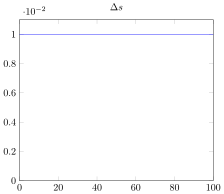

In [43]:
using Interact

@manipulate for w1 in linspace(-20.0,20.0,41),
                w2 in linspace(-10.0,10.0,41),
                w3 in linspace(-10.0,10.0,41),
                w4 in linspace(-10.0,10.0,41)
    
    function Ptilde_ds(ds::Float64)
        μ, σ = 30.0, 70.0
        ds = (ds - μ)/σ
        ds = clamp(ds, -1.0, 1.0)

        f = [ds, ds^2, ds^3, ds^4]
        θ = [w1, w2, w3, w4]
        exp(dot(θ, f))
    end

    domain = (0.0, 100.0)

    Z = _integrate_simpsons(Ptilde_ds, domain..., 100)
    Axis(PGFPlots.Plots.Linear(x->Ptilde_ds(x)/Z, domain, style="mark=none"), xmin=domain[1], xmax=domain[2], ymin=0.0, title=L"\Delta s")
end